### 노선별 승하차, 총승객 분석

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm

In [171]:
plt.rcParams['font.family']='HYGPRM'

In [172]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")
df10=pd.read_csv("MetroData/detail.csv")

### 데이터 확인

In [173]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145794 entries, 0 to 145793
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      145794 non-null  object
 1   노선      145794 non-null  object
 2   역       145794 non-null  object
 3   승차승객    145794 non-null  int64 
 4   하차승객    145794 non-null  int64 
 5   총 승객    145794 non-null  int64 
 6   승차-하차   145794 non-null  int64 
 7   월       145794 non-null  int64 
 8   일       145794 non-null  int64 
 9   요일      145794 non-null  object
dtypes: int64(6), object(4)
memory usage: 11.1+ MB


In [174]:
df9.describe()

,승차승객,하차승객,총 승객,승차-하차,월,일
count,145794.000000,145794.000000,145794.000000,145794.000000,145794.000000,145794.000000
mean,9826.457275,9791.574585,19618.031860,34.882691,4.541161,15.706442
std,9877.384268,10016.668445,19864.623821,1090.620867,2.298354,8.791725
min,1.000000,0.000000,1.000000,-20299.000000,1.000000,1.000000
25%,3333.000000,3223.000000,6582.000000,-206.000000,3.000000,8.000000
50%,7000.500000,6821.500000,13852.000000,63.000000,5.000000,16.000000
75%,12953.000000,12796.000000,25805.750000,369.000000,7.000000,23.000000
max,122543.000000,118237.000000,240780.000000,28118.000000,8.000000,31.000000


In [175]:
df9.isna().sum()

날짜       0
노선       0
역        0
승차승객     0
하차승객     0
총 승객     0
승차-하차    0
월        0
일        0
요일       0
dtype: int64

In [176]:
df9.skew()

C:\Users\KB\AppData\Local\Temp\ipykernel_4800\1148128705.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df9.skew()


승차승객     2.557111
하차승객     2.529107
총 승객     2.541926
승차-하차   -0.779408
월       -0.029571
일        0.009840
dtype: float64

In [177]:
df9.kurt()

C:\Users\KB\AppData\Local\Temp\ipykernel_4800\1090878688.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df9.kurt()


승차승객     10.111956
하차승객      9.632425
총 승객      9.852909
승차-하차    22.458708
월        -1.236771
일        -1.190428
dtype: float64

In [178]:
df9

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-01-01,3호선,수서,7370,7076,14446,294,1,1,토
1,2022-01-01,3호선,학여울,461,473,934,-12,1,1,토
2,2022-01-01,3호선,대청,3224,2903,6127,321,1,1,토
3,2022-01-01,3호선,일원,3321,2803,6124,518,1,1,토
4,2022-01-01,경원선,창동,1,0,1,1,1,1,토
...,...,...,...,...,...,...,...,...,...,...
145789,2022-08-31,중앙선,국수,901,848,1749,53,8,31,수
145790,2022-08-31,중앙선,아신,639,632,1271,7,8,31,수
145791,2022-08-31,중앙선,오빈,321,317,638,4,8,31,수
145792,2022-08-31,중앙선,양평,2850,2848,5698,2,8,31,수


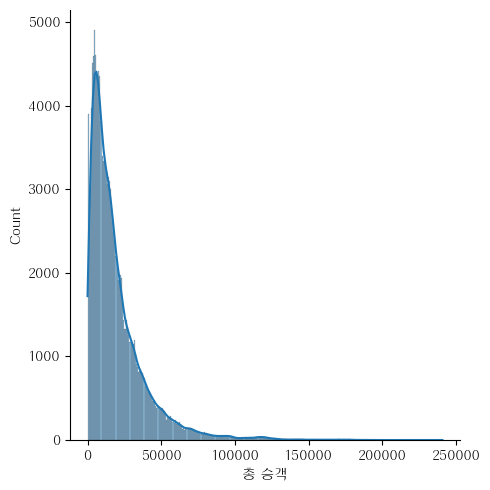

In [179]:
sns.displot(data=df9, x="총 승객", kde=True)

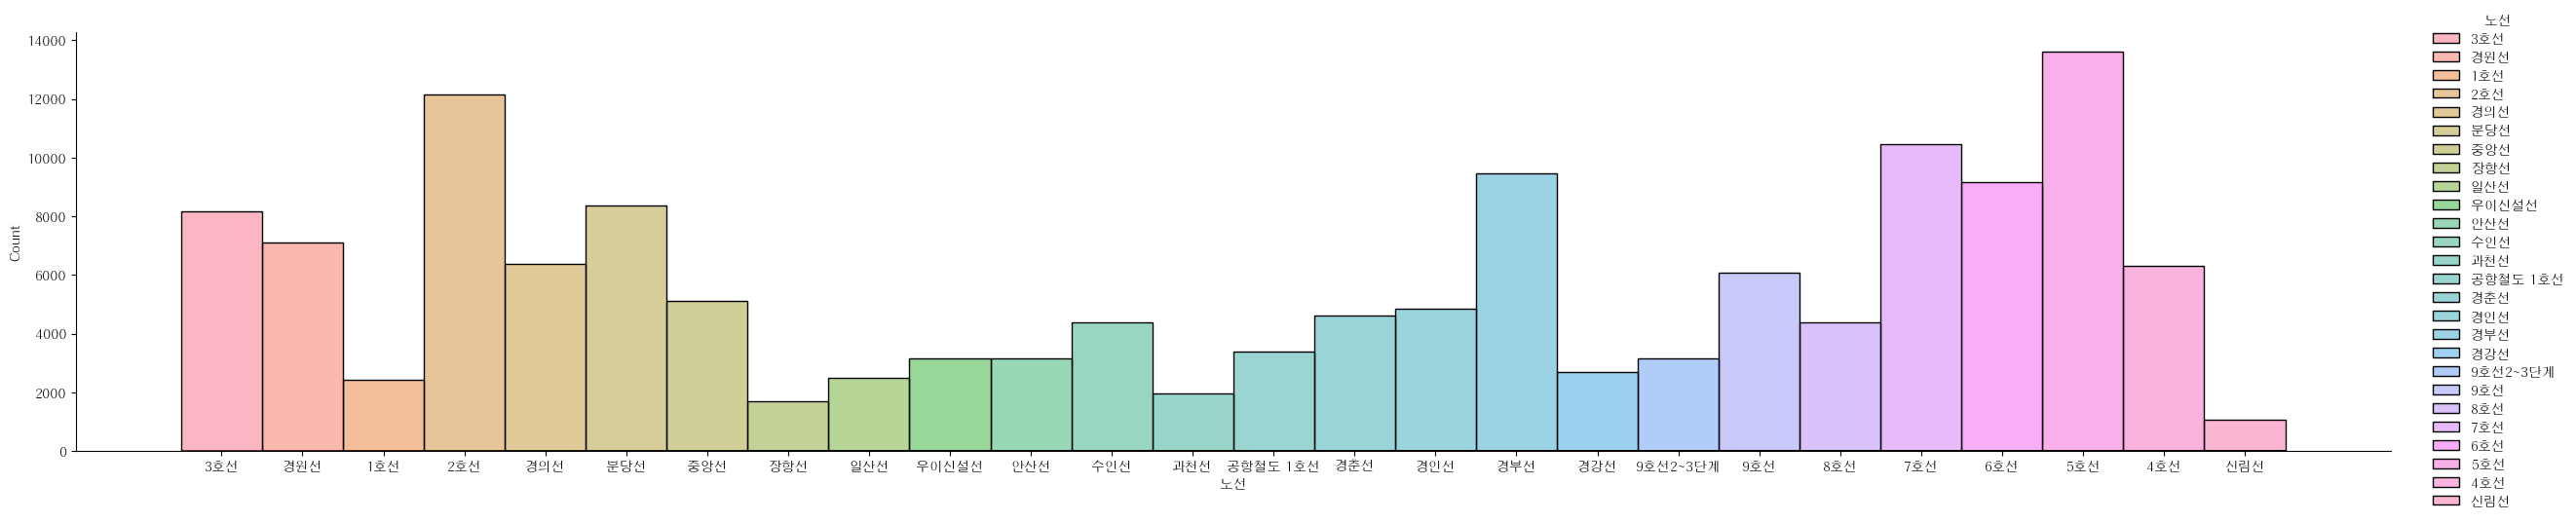

In [180]:
sns.displot(data=df9, x="노선", kde=True, aspect=5, hue="노선")

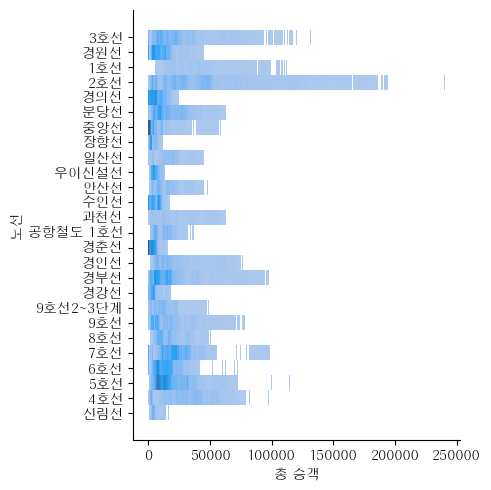

In [181]:
sns.displot(data=df9, x="총 승객", y="노선")

<AxesSubplot:xlabel='승차승객', ylabel='하차승객'>

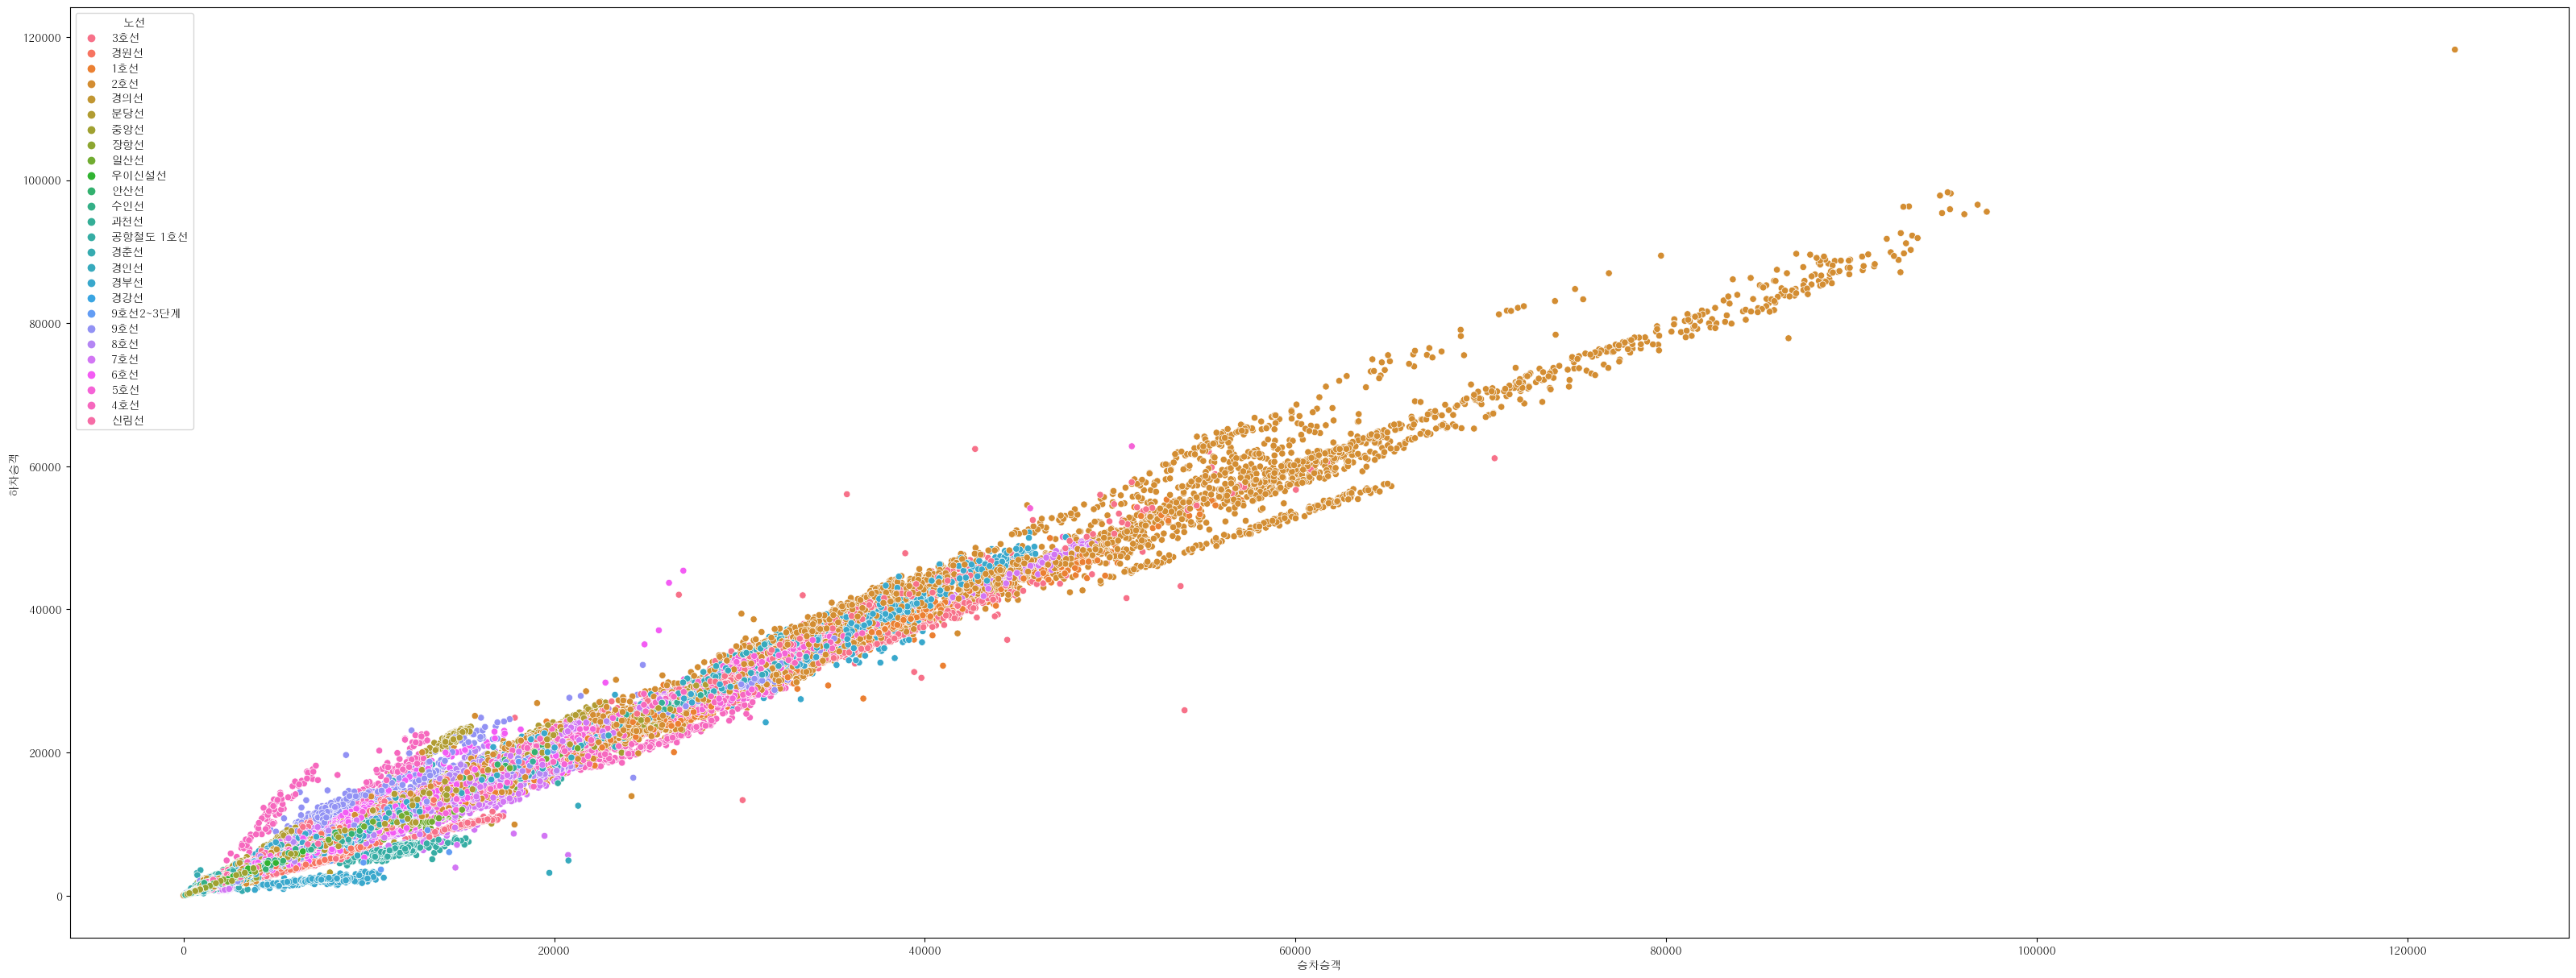

In [182]:
sns.scatterplot(data=df9, x="승차승객", y="하차승객", hue="노선")

In [183]:
df9.count()

날짜       145794
노선       145794
역        145794
승차승객     145794
하차승객     145794
총 승객     145794
승차-하차    145794
월        145794
일        145794
요일       145794
dtype: int64

In [184]:
df9.노선

0         3호선
1         3호선
2         3호선
3         3호선
4         경원선
         ... 
145789    중앙선
145790    중앙선
145791    중앙선
145792    중앙선
145793    중앙선
Name: 노선, Length: 145794, dtype: object

In [185]:
df9.groupby("노선").sum()

,승차승객,하차승객,총 승객,승차-하차,월,일
노선,,,,,,
1호선,47089220,46054575,93143795,1034645,11000,38160
2호선,283346582,287042372,570388954,-3695790,55000,190800
3호선,107229579,107011542,214241121,218037,36999,128429
4호선,100342602,101498212,201840814,-1155610,28600,99216
5호선,132427996,131681073,264109069,746923,61600,213696
6호선,68918509,67981762,136900271,936747,41593,144131
7호선,123590772,121697365,245288137,1893407,46815,164066
8호선,39029479,39378533,78408012,-349054,19800,68688
9호선,57517483,58153388,115670871,-635905,27500,95400


### 총 승객 순으로 정렬

In [186]:
df9[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객,승차-하차
노선,,,,
2호선,283346582,287042372,570388954,-3695790
5호선,132427996,131681073,264109069,746923
7호선,123590772,121697365,245288137,1893407
3호선,107229579,107011542,214241121,218037
4호선,100342602,101498212,201840814,-1155610
경부선,94919637,94291805,189211442,627832
분당선,76857721,79344766,156202487,-2487045
6호선,68918509,67981762,136900271,936747
경인선,59040769,57678579,116719348,1362190


### 노선별 총 승객 정보
 - 2호선, 5호선, 7호선, 3호선, 4호선 순으로 이용자가 많다
 - 신림선, 장항선, 경강선, 경춘선, 우이신설선 순으로 이용자가 적다
 - 2호선의 이용자가 압도적으로 많다

In [187]:
df9[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객,승차-하차
노선,,,,
2호선,23320.706337,23624.886584,46945.592922,-304.180247
1호선,19378.279835,18952.500000,38330.779835,425.779835
4호선,15882.019943,16064.927509,31946.947452,-182.907566
3호선,13119.977854,13093.300135,26213.277988,26.677719
경인선,12148.306379,11868.020370,24016.326749,280.286008
7호선,11809.916101,11628.988533,23438.904634,180.927568
과천선,11153.318416,11045.965021,22199.283436,107.353395
경부선,10015.789490,9949.541522,19965.331012,66.247969
5호선,9731.628160,9676.739638,19408.367798,54.888521


### 총 승객의 평균 정보
 - 전체 이용자 수와 다른 부분이 있다
 - 평균 총 승객은 2호선이 가장 많고, 경춘선이 가장 적다
 - 2호선, 1호선, 4호선, 3호선, 경인선 순으로 많다
 - 경춘선, 장항선, 경강선, 수인선, 신림선 순으로 적다

### 월별 노선의 총 승객

In [188]:
df1a=df1[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df1b=df1[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df2a=df2[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df2b=df2[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df3a=df3[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df3b=df3[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df4a=df4[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df4b=df4[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df5a=df5[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df5b=df5[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df6a=df6[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df6b=df6[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df7a=df7[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df7b=df7[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)
df8a=df8[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").sum().sort_values(by="총 승객", ascending=False)
df8b=df8[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby("노선").mean().sort_values(by="총 승객", ascending=False)

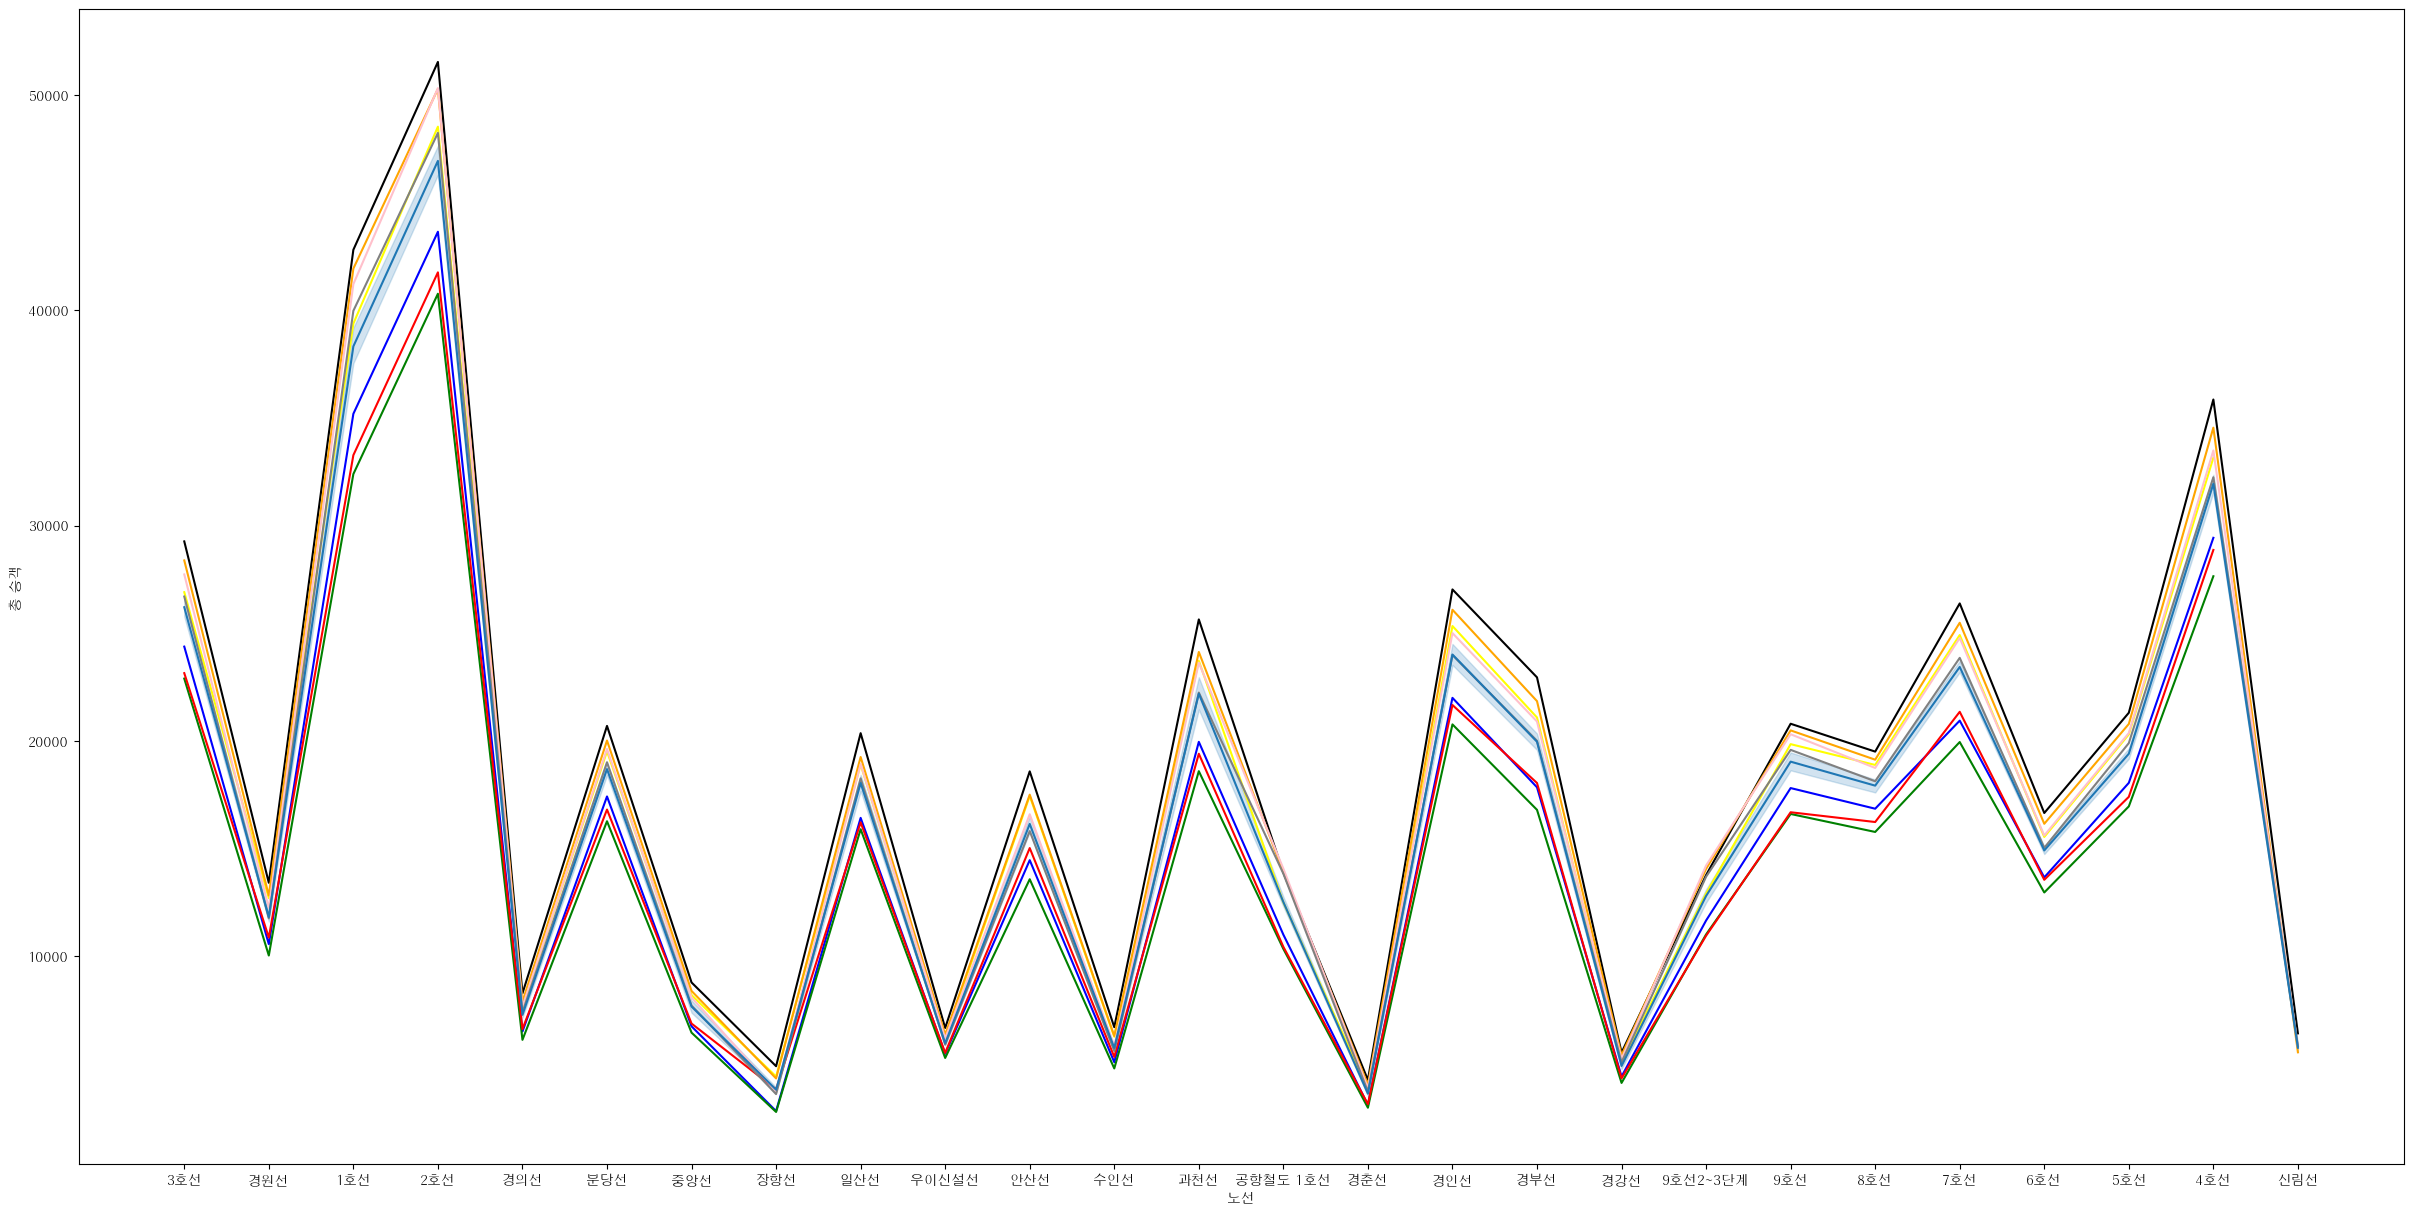

In [189]:
fig=plt.subplots(1, figsize=(30,15))
sns.lineplot(x=df1["노선"], y=df1["총 승객"], errorbar=None, color="Blue")
sns.lineplot(x=df2["노선"], y=df2["총 승객"], errorbar=None, color="Green")
sns.lineplot(x=df3["노선"], y=df3["총 승객"], errorbar=None, color="Red")
sns.lineplot(x=df4["노선"], y=df4["총 승객"], errorbar=None, color="Yellow")
sns.lineplot(x=df5["노선"], y=df5["총 승객"], errorbar=None, color="Black")
sns.lineplot(x=df6["노선"], y=df6["총 승객"], errorbar=None, color="Orange")
sns.lineplot(x=df7["노선"], y=df7["총 승객"], errorbar=None, color="Pink")
sns.lineplot(x=df8["노선"], y=df8["총 승객"], errorbar=None, color="Grey")
sns.lineplot(x=df9["노선"], y=df9["총 승객"])
plt.show()

### 참고
 - 신림선은 5월 28일 개통으로 그 이전 데이터 없음

In [190]:
df9a=df9.pivot_table(index="월", columns="노선", values="총 승객")
df9a

노선,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,공항철도 1호선,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선
월,,,,,,,,,,,,,,,,,,,,,
1,35196.625806,43653.232903,24383.783862,29437.203474,18055.775346,13663.841474,20945.650215,16855.062724,17813.563871,11662.337469,...,11004.529954,19960.165323,17423.384255,5081.691756,NaN,14464.982630,5468.786600,16428.866044,2809.474654,6745.542243
2,32398.550000,40774.674286,22898.817021,27653.245879,16962.439413,12963.789174,19951.843028,15775.049603,16610.682857,11015.024725,...,10342.211735,18597.991071,16272.207900,4790.833333,NaN,13578.607143,5277.629121,15901.947183,2770.117347,6453.175170
3,33276.367742,41767.422581,23151.466859,28874.148883,17405.872696,13553.235495,21355.996283,16236.259857,16689.815484,10955.218362,...,10438.414747,19407.415323,16815.561502,5327.740143,NaN,15026.724566,5512.449132,16220.462264,3816.096774,6875.219662
4,39388.526667,48533.842000,26912.061204,33158.924359,20305.444048,15544.340407,24920.967033,18887.494444,19853.649333,12913.566667,...,12502.252381,23723.575000,19520.956268,6262.320370,NaN,17443.133333,6242.748718,18908.550820,4417.038095,8197.758730
5,42815.854839,51541.072903,29270.865201,35861.838710,21311.559332,16655.410562,26390.007628,19506.910394,20800.927742,13771.838710,...,13884.562212,25646.935484,20700.681989,6708.229391,6418.000000,18588.818859,6670.260546,20363.369427,4894.433180,8784.062980
6,41943.436667,50286.223333,28387.732938,34554.153846,20791.584524,16154.348940,25492.059335,19131.672222,20492.433333,14060.756410,...,13920.595238,24134.850000,20022.055233,6301.644444,5540.863636,17508.084615,6365.220513,19257.252427,4326.352381,8391.022222
7,41221.409677,50325.717419,27736.885687,33493.224566,20369.753456,15612.112436,24783.029839,18747.173835,20313.212903,14215.508685,...,14070.096774,23636.975806,19629.193639,5831.430108,5792.123167,16597.521092,6187.972705,18932.487500,3724.488479,8088.448541
8,39982.038710,48244.368387,26710.286538,32250.519851,19901.368664,15038.180426,23861.742944,18129.569892,19587.423226,13695.493797,...,13836.605991,22249.455645,19013.088263,5599.274194,5831.709677,15814.990074,5896.263027,18261.798107,3598.456221,7709.950845


In [191]:
df9.노선.unique()

array(['3호선', '경원선', '1호선', '2호선', '경의선', '분당선', '중앙선', '장항선', '일산선',
       '우이신설선', '안산선', '수인선', '과천선', '공항철도 1호선', '경춘선', '경인선', '경부선',
       '경강선', '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '신림선'],
      dtype=object)

In [192]:
combine=[df9]

In [193]:
for dataset in combine:
    print(dataset.shape)

(145794, 10)


In [194]:
line_mapping={"1호선":0, "2호선":1, "3호선":2, "4호선":3, "5호선":4, "6호선":5, "7호선":6, "8호선":7, "9호선":8, "9호선2~3단계":9, "공항철도 1호선":10, "경원선":11, "경의선":12,\
              "분당선":13, "중앙선":14, "장항선":15, "일산선":16, "우이신설선":17, "안산선":18, "수인선":19, "과천선":20, "경춘선":21, "경인선":22, "경부선":23, "경강선":24, "신림선":25}
for dataset in combine:
    dataset["노선"]=dataset["노선"].map(line_mapping)
    dataset["노선"]=dataset["노선"].fillna(0)
df9.sample(5)

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
120054,2022-07-20,24,이매,1271,1108,2379,163,7,20,수
85426,2022-05-24,5,보문,8047,7318,15365,729,5,24,화
48253,2022-03-22,5,한강진,6372,7448,13820,-1076,3,22,화
59640,2022-04-10,23,서울역,8234,1841,10075,6393,4,10,일
47126,2022-03-20,1,을지로입구,13052,12116,25168,936,3,20,일


In [195]:
week_mapping={"월":0, "화":1, "수":2, "목":3, "금":4, "토":5, "일":6}
for dataset in combine:
    dataset["요일"]=dataset["요일"].map(week_mapping)
    dataset["요일"]=dataset["요일"].fillna(0)
df9.sample(5)

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
43303,2022-03-14,11,양주,7031,6724,13755,307,3,14,0
27581,2022-02-16,4,올림픽공원(한국체대),3599,3131,6730,468,2,16,2
93582,2022-06-06,13,매탄권선,2458,2410,4868,48,6,6,0
65771,2022-04-21,23,병점,16549,16838,33387,-289,4,21,3
131075,2022-08-07,22,부천,21127,20455,41582,672,8,7,6


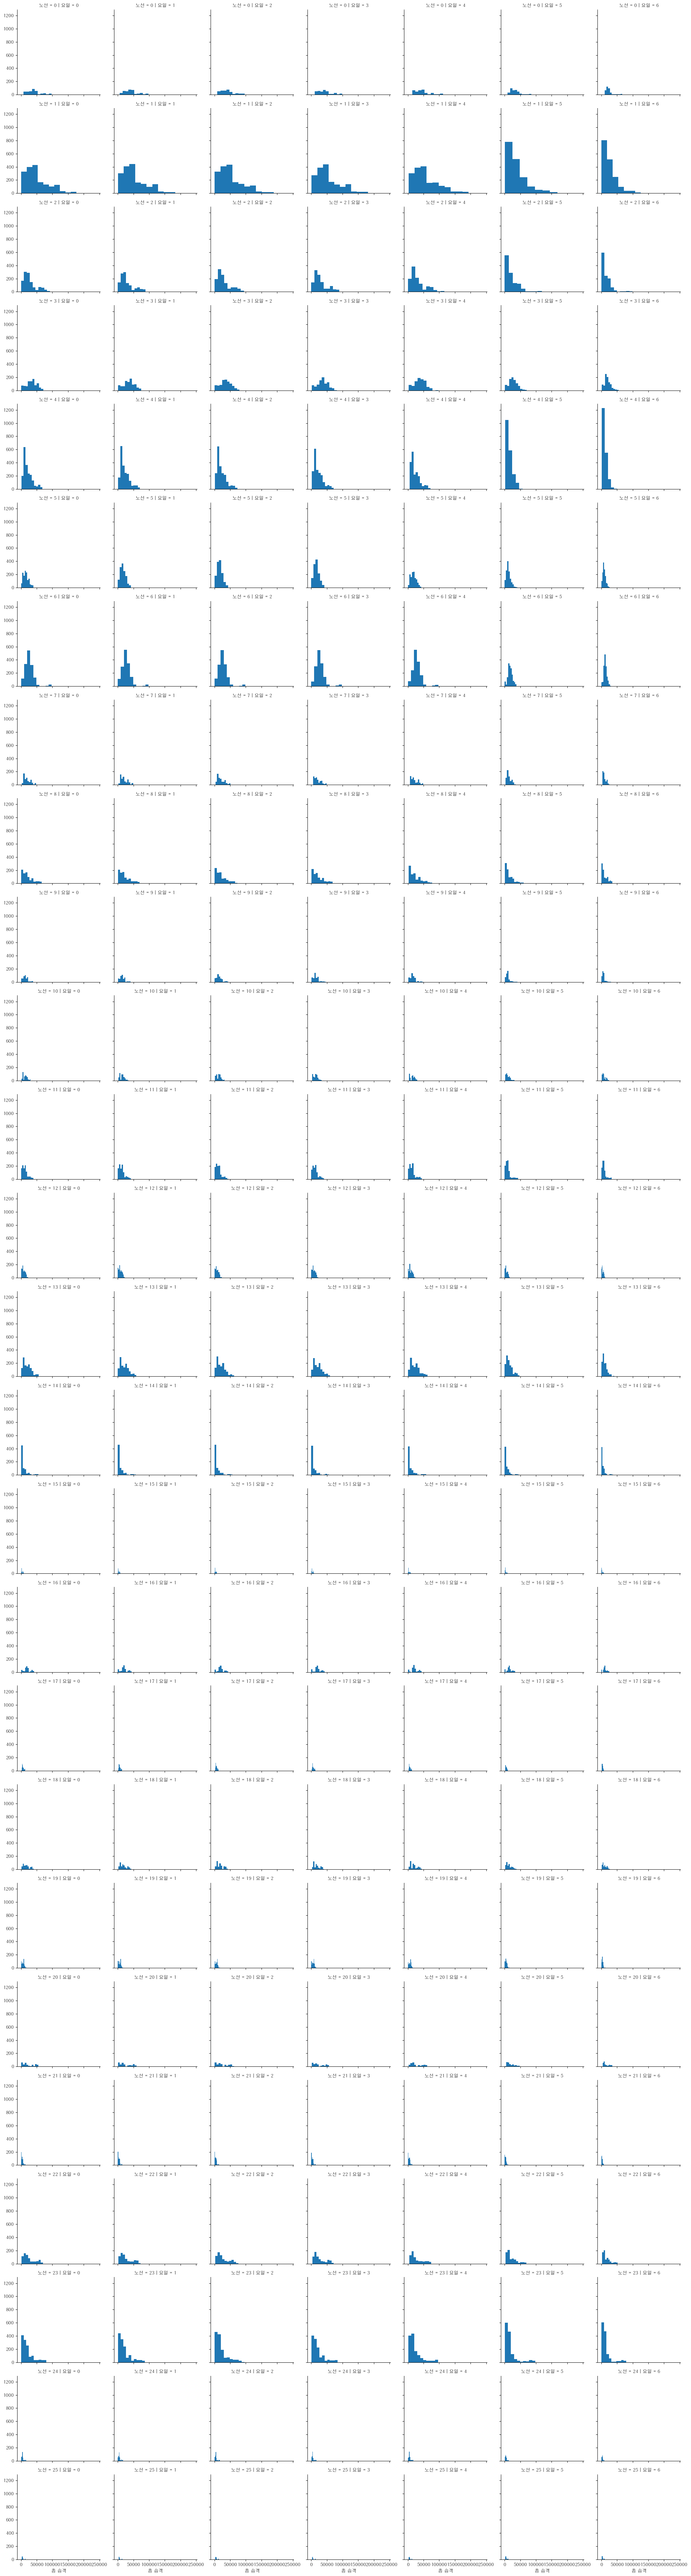

In [196]:
g=sns.FacetGrid(df9, row="노선", col="요일")
g.map(plt.hist, "총 승객")

In [197]:
df9["총 승객구분"]=pd.cut(df9["총 승객"], 20)
df9[["총 승객구분", "승차승객", "하차승객"]].groupby(["총 승객구분"], as_index=False).mean().sort_values(by="총 승객구분")

,총 승객구분,승차승객,하차승객
0,"(-239.779, 12039.95]",3043.537013,2950.236784
1,"(12039.95, 24078.9]",8749.458748,8587.214739
2,"(24078.9, 36117.85]",14741.256455,14755.184773
3,"(36117.85, 48156.8]",20500.629661,20825.175744
4,"(48156.8, 60195.75]",26753.562806,26740.355220
5,"(60195.75, 72234.7]",32466.596963,33215.193146
6,"(72234.7, 84273.65]",38123.324742,39468.782769
7,"(84273.65, 96312.6]",44761.469287,45482.665848
8,"(96312.6, 108351.55]",50939.158996,50666.269874
9,"(108351.55, 120390.5]",57483.172147,57466.470019


In [199]:
df9

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일,총 승객구분
0,2022-01-01,2,수서,7370,7076,14446,294,1,1,5,"(12039.95, 24078.9]"
1,2022-01-01,2,학여울,461,473,934,-12,1,1,5,"(-239.779, 12039.95]"
2,2022-01-01,2,대청,3224,2903,6127,321,1,1,5,"(-239.779, 12039.95]"
3,2022-01-01,2,일원,3321,2803,6124,518,1,1,5,"(-239.779, 12039.95]"
4,2022-01-01,11,창동,1,0,1,1,1,1,5,"(-239.779, 12039.95]"
...,...,...,...,...,...,...,...,...,...,...,...
145789,2022-08-31,14,국수,901,848,1749,53,8,31,2,"(-239.779, 12039.95]"
145790,2022-08-31,14,아신,639,632,1271,7,8,31,2,"(-239.779, 12039.95]"
145791,2022-08-31,14,오빈,321,317,638,4,8,31,2,"(-239.779, 12039.95]"
145792,2022-08-31,14,양평,2850,2848,5698,2,8,31,2,"(-239.779, 12039.95]"


In [202]:
for dataset in combine:
    dataset.loc[dataset["총 승객"]<=12039.95, "총 승객"]=0
    dataset.loc[(dataset["총 승객"]>12039.95)&(dataset["총 승객"]<=24078.9), "총 승객"]=1
    dataset.loc[(dataset["총 승객"]>24078.9)&(dataset["총 승객"]<=36117.85), "총 승객"]=2
    dataset.loc[(dataset["총 승객"]>36117.85)&(dataset["총 승객"]<=48156.8), "총 승객"]=3
    dataset.loc[(dataset["총 승객"]>48156.8)&(dataset["총 승객"]<=60195.75),"총 승객"]=4
    dataset.loc[(dataset["총 승객"]>60195.75)&(dataset["총 승객"]<=72234.7), "총 승객"]=5
    dataset.loc[(dataset["총 승객"]>72234.7)&(dataset["총 승객"]<=84273.65), "총 승객"]=6
    dataset.loc[(dataset["총 승객"]>84273.65)&(dataset["총 승객"]<=96312.6), "총 승객"]=7
    dataset.loc[(dataset["총 승객"]>96312.6)&(dataset["총 승객"]<=108351.55),"총 승객"]=8
    dataset.loc[(dataset["총 승객"]>108351.55)&(dataset["총 승객"]<=120390.5), "총 승객"]=9
    dataset.loc[(dataset["총 승객"]>120390.5)&(dataset["총 승객"]<=132429.45), "총 승객"]=10
    dataset.loc[(dataset["총 승객"]>132429.45)&(dataset["총 승객"]<=144468.4), "총 승객"]=11
    dataset.loc[(dataset["총 승객"]>144468.4)&(dataset["총 승객"]<=156507.35),"총 승객"]=12
    dataset.loc[(dataset["총 승객"]>156507.35)&(dataset["총 승객"]<=168546.3), "총 승객"]=13
    dataset.loc[(dataset["총 승객"]>168546.3)&(dataset["총 승객"]<=180585.25), "총 승객"]=14
    dataset.loc[(dataset["총 승객"]>180585.25)&(dataset["총 승객"]<=192624.2), "총 승객"]=15
    dataset.loc[(dataset["총 승객"]>192624.2)&(dataset["총 승객"]<=204663.15),"총 승객"]=16
    dataset.loc[(dataset["총 승객"]>204663.15)&(dataset["총 승객"]<=228741.05), "총 승객"]=17
    dataset.loc[(dataset["총 승객"]>228741.05)&(dataset["총 승객"]<=240780.0), "총 승객"]=18
    dataset.loc[dataset["총 승객"]>240780.0, "총 승객"]=19
df9.head()

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일,총 승객구분
0,2022-01-01,2,수서,7370,7076,1,294,1,1,5,"(12039.95, 24078.9]"
1,2022-01-01,2,학여울,461,473,0,-12,1,1,5,"(-239.779, 12039.95]"
2,2022-01-01,2,대청,3224,2903,0,321,1,1,5,"(-239.779, 12039.95]"
3,2022-01-01,2,일원,3321,2803,0,518,1,1,5,"(-239.779, 12039.95]"
4,2022-01-01,11,창동,1,0,0,1,1,1,5,"(-239.779, 12039.95]"


In [203]:
df9=df9.drop(["총 승객구분"], axis=1)
df9

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-01-01,2,수서,7370,7076,1,294,1,1,5
1,2022-01-01,2,학여울,461,473,0,-12,1,1,5
2,2022-01-01,2,대청,3224,2903,0,321,1,1,5
3,2022-01-01,2,일원,3321,2803,0,518,1,1,5
4,2022-01-01,11,창동,1,0,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...
145789,2022-08-31,14,국수,901,848,0,53,8,31,2
145790,2022-08-31,14,아신,639,632,0,7,8,31,2
145791,2022-08-31,14,오빈,321,317,0,4,8,31,2
145792,2022-08-31,14,양평,2850,2848,0,2,8,31,2
